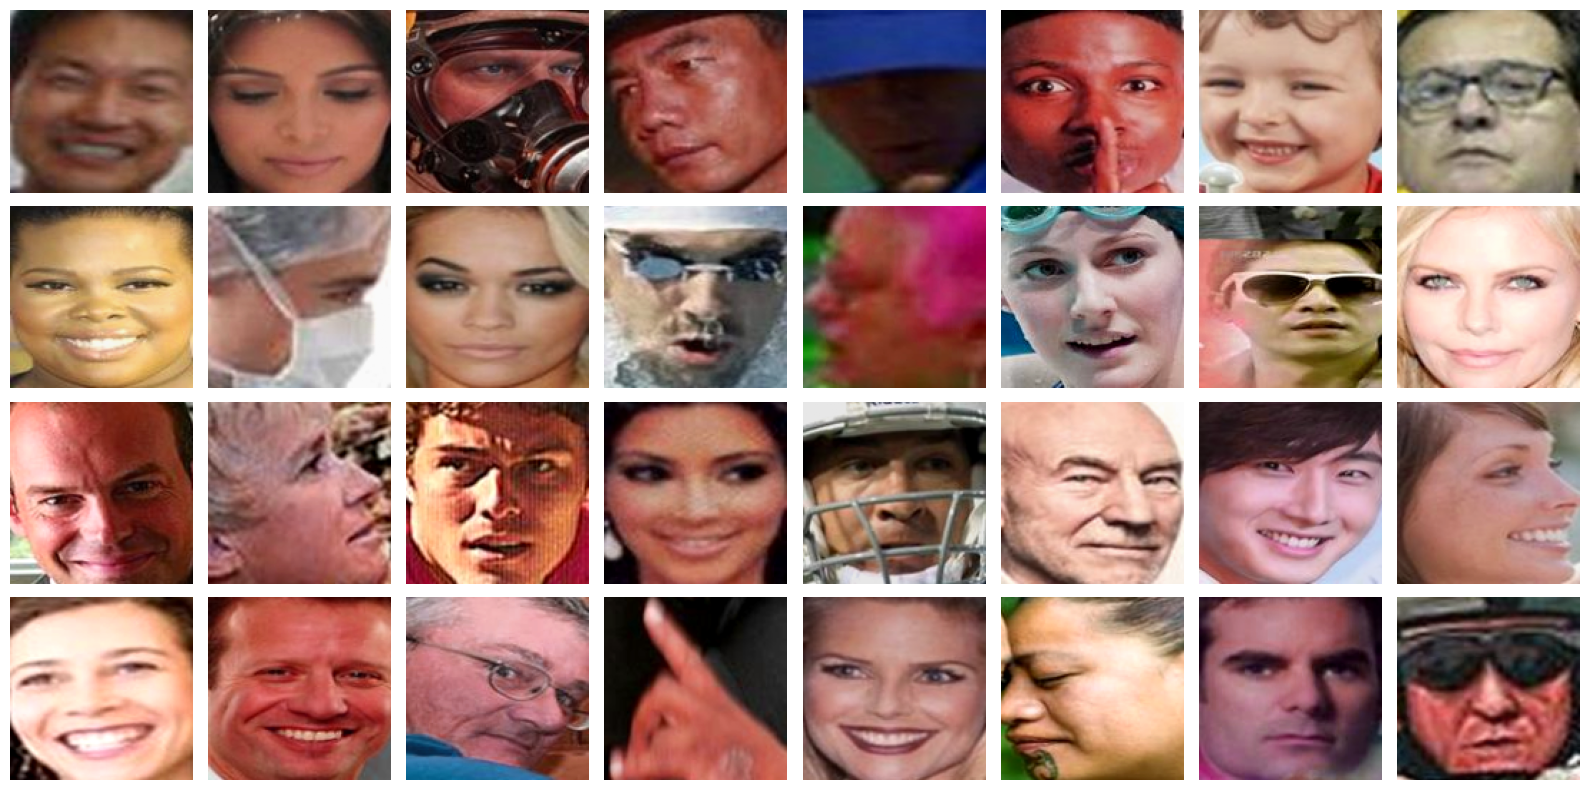

In [11]:
from PIL import Image
from faceGAN.dataset import FaceDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataset = FaceDataset(image_dir="data/train")
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

def visualize_batch(batch):
    images = batch['image']
    
    images = images.permute(0, 2, 3, 1)  # Change shape to (batch_size, height, width, channels)
    
    images = (images * 0.5 + 0.5).clamp(0, 1)  # Rescale to [0, 1]
    images = images.numpy()  # Convert to numpy array for visualization
    
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
batch = next(iter(dataloader))
visualize_batch(batch)

In [6]:
batch['image'].shape

torch.Size([32, 3, 128, 128])

In [10]:
batch["embedding"].view(-1).min()

tensor(-0.1909)